<a href="https://colab.research.google.com/github/SakshatVacche/CodSoft/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (3).zip to archive (3) (1).zip


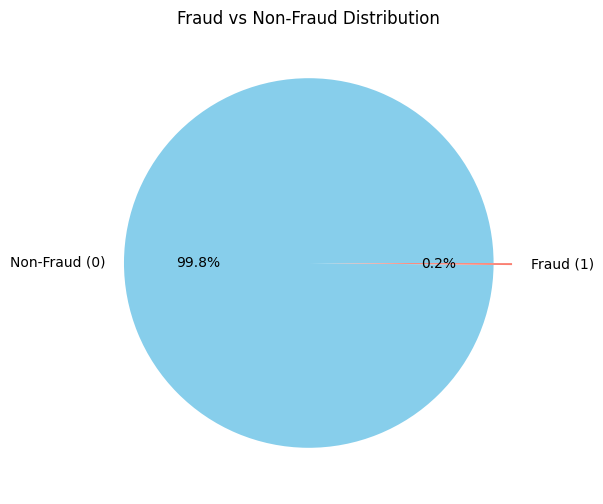

/tmp/ipython-input-4-556612402.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='scaled_amount', data=df, palette='Set3')


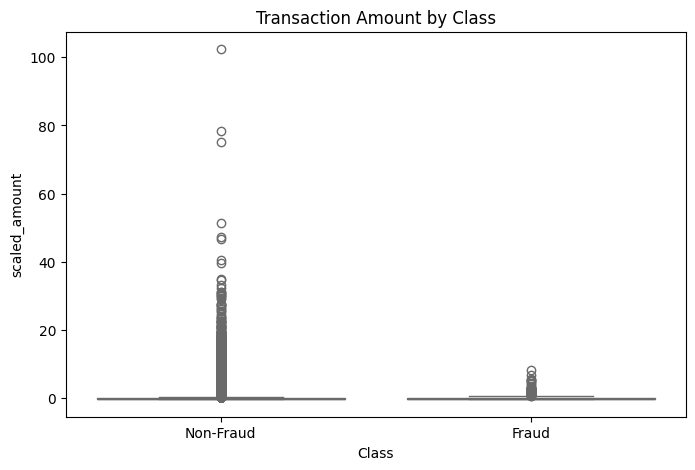

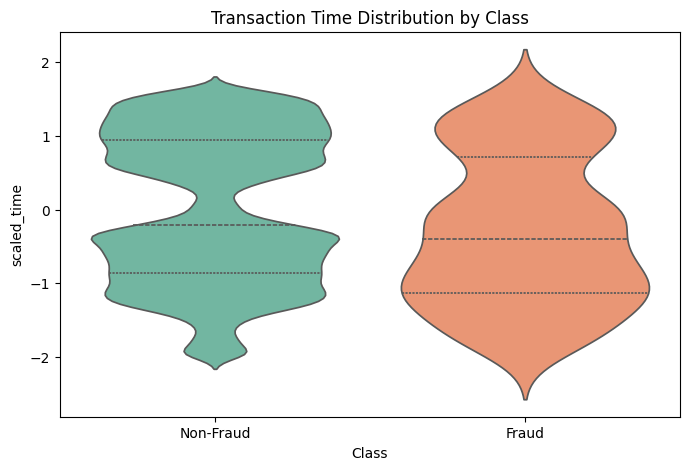

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files

# Upload and load CSV
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(filename)
df.columns = df.columns.str.strip()

# Scale 'Amount' and 'Time'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_time'] = scaler.fit_transform(df[['Time']])
df.drop(['Amount', 'Time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', df.pop('scaled_amount'))
df.insert(1, 'scaled_time', df.pop('scaled_time'))

# Pie chart: Class distribution
plt.figure(figsize=(6,6))
df['Class'].value_counts().plot.pie(labels=['Non-Fraud (0)', 'Fraud (1)'], autopct='%1.1f%%', colors=['skyblue', 'salmon'], explode=(0,0.1))
plt.title("Fraud vs Non-Fraud Distribution")
plt.ylabel("")
plt.show()

# Box plot: Scaled Amount vs Class
plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y='scaled_amount', data=df, palette='Set3')
plt.title("Transaction Amount by Class")
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.show()

# Violin plot: Scaled Time vs Class
plt.figure(figsize=(8, 5))
sns.violinplot(x='Class', y='scaled_time', data=df, palette='Set2', inner='quartile')
plt.title("Transaction Time Distribution by Class")
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.show()

# Prepare data
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Bar plot: Feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index, palette='coolwarm')
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.show()
